# LIME (Local Interpretable Model-agnostic Explanations)

## Resumo

O LIME [1] é uma técnica que visa fornecer interpretações locais das decisões tomadas por modelos de aprendizado de máquina, sendo agnóstica em relação ao modelo em si. A principal ideia do LIME é criar um modelo menor que seja uma aproximação local do modelo original. Para isso, são selecionados dados de entrada aleatórios próximos à instância que se deseja explicar. Em seguida, um modelo simples, como uma regressão linear, é ajustado para mapear as características dos dados de entrada e os rótulos preditos. Dessa forma, obtemos uma intuição sobre quais features são mais importantes para a predição, pois a regressão linear é um modelo explicável.

## Como utilizar LIME em imagens?

Segue o passo a passo de como seria para aplicar o LIME em imagens, para entender com mais detalhes recomendo ler [2]:

1. Decomposição em superpixels: A imagem inicial é dividida em regiões compactas e semelhantes chamadas superpixels.

2. Criação de exemplos de imagem: São gerados vários exemplos de imagem ativando e desativando os superpixels. Isso significa que diferentes combinações de superpixels são ativadas ou desativadas em cada exemplo.

3. Cálculo da distância: A distância entre cada exemplo de imagem gerado e a imagem original é calculada. Essa distância pode ser medida por métricas como distância euclidiana ou outras técnicas de similaridade.

4. Geração de predições: O modelo original é utilizado para gerar predições nos exemplos de imagem criados anteriormente.

5. Criação de um modelo local: Um modelo local é criado utilizando regressão linear ponderada. O valor predito (y_pred) é determinado pela combinação ponderada dos superpixels ativados, onde cada superpixel é multiplicado por um valor de peso específico. A distância entre o exemplo de imagem e a imagem original é usada como um fator de ponderação.

6. Aprendizado dos pesos: Durante o treinamento do modelo local, os pesos são ajustados de forma a minimizar a diferença entre as predições do modelo original e as predições geradas pelo modelo local. Os pesos aprendidos revelam quais regiões (superpixels) são mais relevantes para a classificação.

## Prática

### Instalação

In [12]:
!pip install lime
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


### Imports

In [13]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import skimage.io as io
from keras.applications import inception_v3 as inc_net
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image
from lime import lime_image
from PIL import Image
from skimage.segmentation import mark_boundaries

### Inicialização de InceptionV3 pré-treinado 

In [14]:
inet_model = inc_net.InceptionV3()

### Função de pré-processamento da imagem

In [15]:
def preprocess_images(image_paths):
    """
    Preprocesses a list of images by resizing them to (299, 299) pixels and normalizing their pixel values.

    Args:
        image_paths (list): A list of paths to the images.

    Returns:
        numpy.ndarray: A 4D numpy array containing the preprocessed images.
            Shape: (num_images, height, width, channels)
    """
    processed_images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        image = image.resize((299, 299))
        x = np.array(image)
        x = np.expand_dims(x, axis=0)
        x = x.astype('float32')
        x /= 255.0
        processed_images.append(x)
    return np.vstack(processed_images)

### Top 5 predições para a imagem de entrada

1/1 [==============================] - 1s 959ms/step
('n02133161', 'American_black_bear', 0.5981358)
('n02104365', 'schipperke', 0.091041654)
('n02105056', 'groenendael', 0.07184331)
('n01877812', 'wallaby', 0.014222581)
('n01883070', 'wombat', 0.0072711976)


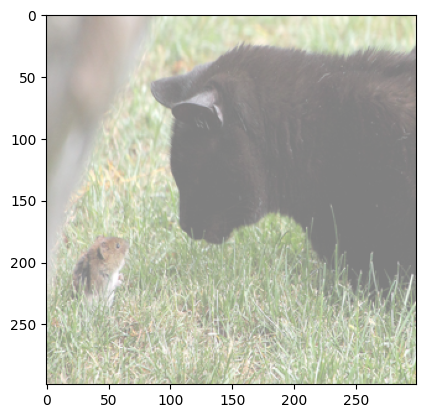

In [16]:
images = preprocess_images(['/home/arnaldo/notebooks/data/cat_mouse.jpg'])

plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)

for x in decode_predictions(preds)[0]:
    print(x)

### Inicialização do explicador LIME p/ imagens

In [17]:
explainer = lime_image.LimeImageExplainer()

### Iniciar explicação

O parâmetro "hide_color" indica a cor que o superpixel desligado vai ser preenchido, se nenhum valor for passado, o valor vai ser a média dos pixels.

In [18]:
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  1%|          | 10/1000 [00:01<02:18,  7.13it/s]

1/1 [==============================] - 1s 1s/step


  2%|▏         | 20/1000 [00:02<02:05,  7.80it/s]

1/1 [==============================] - 1s 570ms/step


  3%|▎         | 30/1000 [00:03<01:36, 10.05it/s]

1/1 [==============================] - 1s 551ms/step


  4%|▍         | 40/1000 [00:03<01:22, 11.57it/s]

1/1 [==============================] - 1s 628ms/step


  5%|▌         | 50/1000 [00:04<01:16, 12.35it/s]

1/1 [==============================] - 1s 527ms/step


  6%|▌         | 60/1000 [00:05<01:10, 13.24it/s]

1/1 [==============================] - 1s 574ms/step


  7%|▋         | 70/1000 [00:05<01:07, 13.76it/s]

1/1 [==============================] - 1s 519ms/step


  8%|▊         | 80/1000 [00:06<01:04, 14.36it/s]

1/1 [==============================] - 1s 516ms/step


  9%|▉         | 90/1000 [00:07<01:00, 15.01it/s]

1/1 [==============================] - 1s 541ms/step


 10%|█         | 100/1000 [00:07<00:58, 15.29it/s]

1/1 [==============================] - 1s 506ms/step


 11%|█         | 110/1000 [00:08<00:56, 15.72it/s]

1/1 [==============================] - 1s 582ms/step


 12%|█▏        | 120/1000 [00:09<00:56, 15.47it/s]

1/1 [==============================] - 1s 615ms/step


 13%|█▎        | 130/1000 [00:09<00:58, 14.93it/s]

1/1 [==============================] - 1s 580ms/step


 14%|█▍        | 140/1000 [00:10<00:57, 14.96it/s]

1/1 [==============================] - 1s 571ms/step


 15%|█▌        | 150/1000 [00:11<00:56, 14.96it/s]

1/1 [==============================] - 0s 489ms/step


 16%|█▌        | 160/1000 [00:11<00:53, 15.72it/s]

1/1 [==============================] - 1s 544ms/step


 17%|█▋        | 170/1000 [00:12<00:52, 15.93it/s]

1/1 [==============================] - 1s 574ms/step


 18%|█▊        | 180/1000 [00:12<00:51, 15.77it/s]

1/1 [==============================] - 0s 481ms/step


 19%|█▉        | 190/1000 [00:13<00:49, 16.47it/s]

1/1 [==============================] - 0s 493ms/step


 20%|██        | 200/1000 [00:14<00:51, 15.62it/s]

1/1 [==============================] - 0s 453ms/step


 21%|██        | 210/1000 [00:14<00:48, 16.31it/s]

1/1 [==============================] - 1s 512ms/step


 22%|██▏       | 220/1000 [00:15<00:46, 16.64it/s]

1/1 [==============================] - 0s 463ms/step


 23%|██▎       | 230/1000 [00:15<00:44, 17.27it/s]

1/1 [==============================] - 0s 475ms/step


 24%|██▍       | 240/1000 [00:16<00:43, 17.63it/s]

1/1 [==============================] - 0s 453ms/step


 25%|██▌       | 250/1000 [00:16<00:41, 18.14it/s]

1/1 [==============================] - 0s 456ms/step


 26%|██▌       | 260/1000 [00:17<00:40, 18.43it/s]

1/1 [==============================] - 0s 486ms/step


 27%|██▋       | 270/1000 [00:17<00:39, 18.38it/s]

1/1 [==============================] - 0s 477ms/step


 28%|██▊       | 280/1000 [00:18<00:39, 18.24it/s]

1/1 [==============================] - 1s 503ms/step


 29%|██▉       | 290/1000 [00:19<00:39, 18.04it/s]

1/1 [==============================] - 0s 441ms/step


 30%|███       | 300/1000 [00:19<00:37, 18.57it/s]

1/1 [==============================] - 0s 448ms/step


 31%|███       | 310/1000 [00:20<00:36, 18.83it/s]

1/1 [==============================] - 0s 469ms/step


 32%|███▏      | 320/1000 [00:20<00:36, 18.84it/s]

1/1 [==============================] - 0s 484ms/step


 33%|███▎      | 330/1000 [00:21<00:35, 18.66it/s]

1/1 [==============================] - 1s 503ms/step


 34%|███▍      | 340/1000 [00:21<00:36, 18.28it/s]

1/1 [==============================] - 0s 479ms/step


 35%|███▌      | 350/1000 [00:22<00:35, 18.32it/s]

1/1 [==============================] - 0s 481ms/step


 36%|███▌      | 360/1000 [00:22<00:35, 18.28it/s]

1/1 [==============================] - 1s 513ms/step


 37%|███▋      | 370/1000 [00:23<00:35, 17.96it/s]

1/1 [==============================] - 0s 499ms/step


 38%|███▊      | 380/1000 [00:24<00:34, 17.88it/s]

1/1 [==============================] - 0s 484ms/step


 39%|███▉      | 390/1000 [00:24<00:33, 17.96it/s]

1/1 [==============================] - 0s 426ms/step


 40%|████      | 400/1000 [00:25<00:32, 18.59it/s]

1/1 [==============================] - 0s 485ms/step


 41%|████      | 410/1000 [00:25<00:32, 18.12it/s]

1/1 [==============================] - 1s 528ms/step


 42%|████▏     | 420/1000 [00:26<00:32, 17.72it/s]

1/1 [==============================] - 0s 451ms/step


 43%|████▎     | 430/1000 [00:26<00:31, 18.09it/s]

1/1 [==============================] - 1s 599ms/step


 44%|████▍     | 440/1000 [00:27<00:32, 17.01it/s]

1/1 [==============================] - 1s 503ms/step


 45%|████▌     | 450/1000 [00:28<00:32, 16.75it/s]

1/1 [==============================] - 1s 579ms/step


 46%|████▌     | 460/1000 [00:28<00:32, 16.39it/s]

1/1 [==============================] - 1s 511ms/step


 47%|████▋     | 470/1000 [00:29<00:32, 16.47it/s]

1/1 [==============================] - 1s 502ms/step


 48%|████▊     | 480/1000 [00:29<00:31, 16.69it/s]

1/1 [==============================] - 0s 419ms/step


 49%|████▉     | 490/1000 [00:30<00:28, 17.73it/s]

1/1 [==============================] - 1s 500ms/step


 50%|█████     | 500/1000 [00:30<00:28, 17.69it/s]

1/1 [==============================] - 1s 504ms/step


 51%|█████     | 510/1000 [00:31<00:27, 17.54it/s]

1/1 [==============================] - 1s 521ms/step


 52%|█████▏    | 520/1000 [00:32<00:27, 17.37it/s]

1/1 [==============================] - 0s 488ms/step


 53%|█████▎    | 530/1000 [00:32<00:26, 17.56it/s]

1/1 [==============================] - 1s 579ms/step


 54%|█████▍    | 540/1000 [00:33<00:27, 16.71it/s]

1/1 [==============================] - 0s 495ms/step


 55%|█████▌    | 550/1000 [00:33<00:26, 16.95it/s]

1/1 [==============================] - 1s 518ms/step


 56%|█████▌    | 560/1000 [00:34<00:25, 16.95it/s]

1/1 [==============================] - 1s 523ms/step


 57%|█████▋    | 570/1000 [00:35<00:25, 16.90it/s]

1/1 [==============================] - 0s 492ms/step


 58%|█████▊    | 580/1000 [00:35<00:24, 17.16it/s]

1/1 [==============================] - 1s 504ms/step


 59%|█████▉    | 590/1000 [00:36<00:23, 17.21it/s]

1/1 [==============================] - 0s 496ms/step


 60%|██████    | 600/1000 [00:36<00:23, 17.15it/s]

1/1 [==============================] - 0s 484ms/step


 61%|██████    | 610/1000 [00:37<00:22, 17.42it/s]

1/1 [==============================] - 0s 483ms/step


 62%|██████▏   | 620/1000 [00:37<00:21, 17.52it/s]

1/1 [==============================] - 1s 550ms/step


 63%|██████▎   | 630/1000 [00:38<00:21, 16.98it/s]

1/1 [==============================] - 0s 482ms/step


 64%|██████▍   | 640/1000 [00:39<00:20, 17.31it/s]

1/1 [==============================] - 0s 460ms/step


 65%|██████▌   | 650/1000 [00:39<00:19, 17.77it/s]

1/1 [==============================] - 0s 476ms/step


 66%|██████▌   | 660/1000 [00:40<00:18, 17.99it/s]

1/1 [==============================] - 0s 487ms/step


 67%|██████▋   | 670/1000 [00:40<00:18, 18.06it/s]

1/1 [==============================] - 0s 474ms/step


 68%|██████▊   | 680/1000 [00:41<00:17, 18.12it/s]

1/1 [==============================] - 0s 454ms/step


 69%|██████▉   | 690/1000 [00:41<00:16, 18.39it/s]

1/1 [==============================] - 0s 494ms/step


 70%|███████   | 700/1000 [00:42<00:16, 18.28it/s]

1/1 [==============================] - 0s 452ms/step


 71%|███████   | 710/1000 [00:42<00:15, 18.52it/s]

1/1 [==============================] - 0s 434ms/step


 72%|███████▏  | 720/1000 [00:43<00:14, 18.98it/s]

1/1 [==============================] - 0s 431ms/step


 73%|███████▎  | 730/1000 [00:43<00:14, 19.27it/s]

1/1 [==============================] - 0s 472ms/step


 74%|███████▍  | 740/1000 [00:44<00:13, 18.99it/s]

1/1 [==============================] - 0s 438ms/step


 75%|███████▌  | 750/1000 [00:44<00:12, 19.28it/s]

1/1 [==============================] - 0s 453ms/step


 76%|███████▌  | 760/1000 [00:45<00:12, 19.29it/s]

1/1 [==============================] - 0s 468ms/step


 77%|███████▋  | 770/1000 [00:45<00:11, 19.18it/s]

1/1 [==============================] - 0s 482ms/step


 78%|███████▊  | 780/1000 [00:46<00:11, 18.92it/s]

1/1 [==============================] - 0s 461ms/step


 79%|███████▉  | 790/1000 [00:47<00:11, 18.96it/s]

1/1 [==============================] - 0s 464ms/step


 80%|████████  | 800/1000 [00:47<00:10, 18.97it/s]

1/1 [==============================] - 0s 414ms/step


 81%|████████  | 810/1000 [00:48<00:09, 19.53it/s]

1/1 [==============================] - 0s 458ms/step


 82%|████████▏ | 820/1000 [00:48<00:09, 19.40it/s]

1/1 [==============================] - 1s 512ms/step


 83%|████████▎ | 830/1000 [00:49<00:09, 18.75it/s]

1/1 [==============================] - 1s 653ms/step


 84%|████████▍ | 840/1000 [00:49<00:09, 16.91it/s]

1/1 [==============================] - 1s 604ms/step


 85%|████████▌ | 850/1000 [00:50<00:09, 16.03it/s]

1/1 [==============================] - 1s 516ms/step


 86%|████████▌ | 860/1000 [00:51<00:08, 16.10it/s]

1/1 [==============================] - 1s 590ms/step


 87%|████████▋ | 870/1000 [00:51<00:08, 15.58it/s]

1/1 [==============================] - 1s 540ms/step


 88%|████████▊ | 880/1000 [00:52<00:07, 15.56it/s]

1/1 [==============================] - 1s 566ms/step


 89%|████████▉ | 890/1000 [00:53<00:07, 15.38it/s]

1/1 [==============================] - 1s 605ms/step


 90%|█████████ | 900/1000 [00:53<00:06, 15.05it/s]

1/1 [==============================] - 1s 539ms/step


 91%|█████████ | 910/1000 [00:54<00:05, 15.29it/s]

1/1 [==============================] - 1s 602ms/step


 92%|█████████▏| 920/1000 [00:55<00:05, 14.91it/s]

1/1 [==============================] - 1s 590ms/step


 93%|█████████▎| 930/1000 [00:55<00:04, 14.76it/s]

1/1 [==============================] - 1s 559ms/step


 94%|█████████▍| 940/1000 [00:56<00:04, 14.91it/s]

1/1 [==============================] - 1s 585ms/step


 95%|█████████▌| 950/1000 [00:57<00:03, 14.73it/s]

1/1 [==============================] - 1s 634ms/step


 96%|█████████▌| 960/1000 [00:57<00:02, 14.41it/s]

1/1 [==============================] - 1s 585ms/step


 97%|█████████▋| 970/1000 [00:58<00:02, 14.43it/s]

1/1 [==============================] - 1s 650ms/step


 98%|█████████▊| 980/1000 [00:59<00:01, 14.04it/s]

1/1 [==============================] - 1s 569ms/step


 99%|█████████▉| 990/1000 [01:00<00:00, 14.27it/s]

1/1 [==============================] - 1s 580ms/step


100%|██████████| 1000/1000 [01:00<00:00, 16.45it/s]


### Explicação via heatmap dos super pixels mais importantes

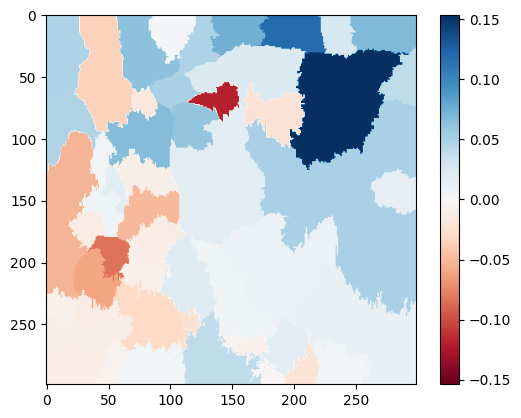

In [19]:
ind = explanation.top_labels[0]

dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### Explicação com os 10 mais importantes super pixels

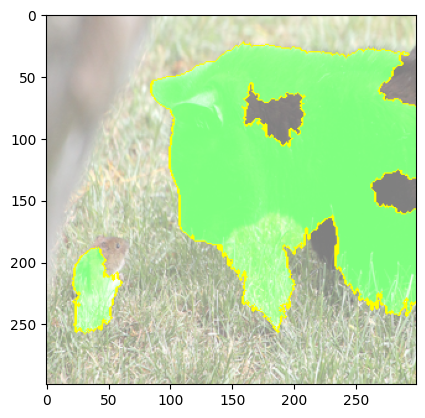

In [20]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Referências

[1] https://arxiv.org/abs/1602.04938

[2] https://arxiv.org/abs/2102.06307